In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
location_data = pd.read_csv(r"C:\Users\varun\Desktop\Udacity\UGP\alllocations.csv")
home_data = pd.read_csv(r"C:\Users\varun\Desktop\Udacity\UGP\home.csv")
school_data = pd.read_csv(r"C:\Users\varun\Desktop\Udacity\UGP\school.csv")
work_data = pd.read_csv(r"C:\Users\varun\Desktop\Udacity\UGP\work.csv")
other_data = pd.read_csv(r"C:\Users\varun\Desktop\Udacity\UGP\others.csv")
print(location_data.shape)
location_data.head()

(16, 16)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
0,2.353049,1.591936,0.816546,0.590494,1.117237,1.456552,1.234776,0.884875,0.504736,0.338567,0.411108,0.407958,0.225969,0.151331,0.071379,0.033979
1,1.397686,10.639846,2.220425,0.693464,0.477456,1.188495,1.349462,1.127641,0.782097,0.361263,0.279587,0.312670,0.221452,0.138872,0.056629,0.034582
2,0.544502,3.377579,11.262449,1.598397,0.720401,0.639215,0.880855,1.047802,0.917897,0.500448,0.289412,0.179894,0.111907,0.112861,0.066998,0.042690
3,0.341783,0.834409,4.577042,13.739771,2.419991,1.084007,0.748040,1.061100,1.025873,0.806560,0.437937,0.226014,0.109983,0.071664,0.035127,0.019968
4,0.617309,0.486346,0.606158,4.206379,5.396941,2.425324,1.318520,1.035971,0.880711,0.885080,0.621726,0.387669,0.135640,0.051803,0.043630,0.030517


After loading the data lets explore whether this baseline matrix is capturing the trends that are found in the Indian society or not.

# Data Exploration

### School Matrix

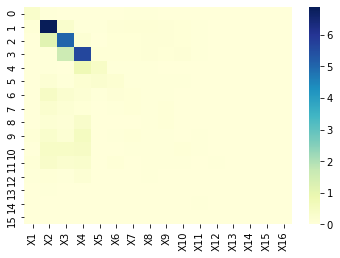

In [3]:
sns.heatmap(school_data, cmap="YlGnBu")

Huge amount of interaction is seen within the students who are of almost the same age. This is seen for students between 3 - 18 years of age

## Home Matrix

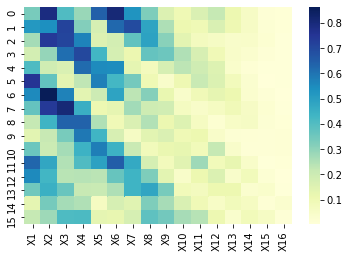

In [4]:
sns.heatmap(home_data, cmap="YlGnBu")

The multiple dominant diagnols are a reflection of the culture of joint family in India. Types of interactions widely noticed - <br/>
• Parent - Parent <br/>
• Parent - Child <br/>
• Child - Child <br/>
• Grandparent - Child <br/>
These include the majors interactions and is quite visible throught the dominant diagonals


## Work Matrix

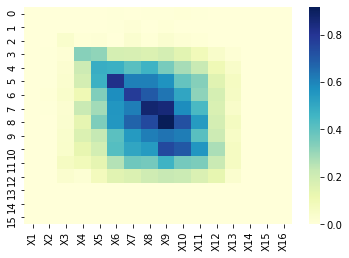

In [5]:
sns.heatmap(work_data, cmap="YlGnBu")

A central correlation is to be expected from the working class with a dominant diagnol.

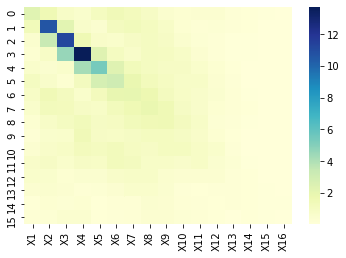

In [6]:
sns.heatmap(location_data, cmap="YlGnBu")

In [9]:
density_data = pd.read_csv(r"C:\Users\varun\Desktop\Udacity\UGP\population.csv")
print(density_data.shape)

(21, 3)


In [10]:
density_data.head()

,Age,M,F
0,0-4,61184852,55596970
1,5- 9,62910580,57039427
2,10 - 14,66812183,60172728
3,15-19,66525043,59164382
4,20-24,64478247,57319089


In [21]:
density_data.dtypes

Age    object
M       int32
F       int32
dtype: object

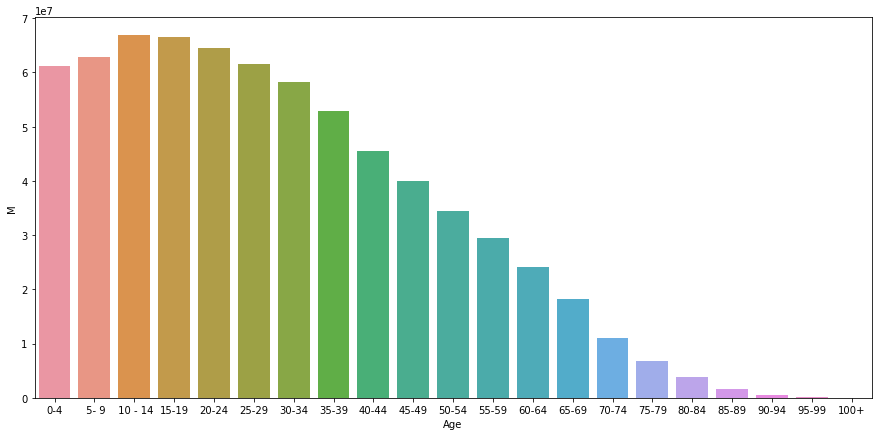

In [74]:
plt.figure(figsize=(15,7))
sns.barplot(x = "Age", y = "M", data = density_data)

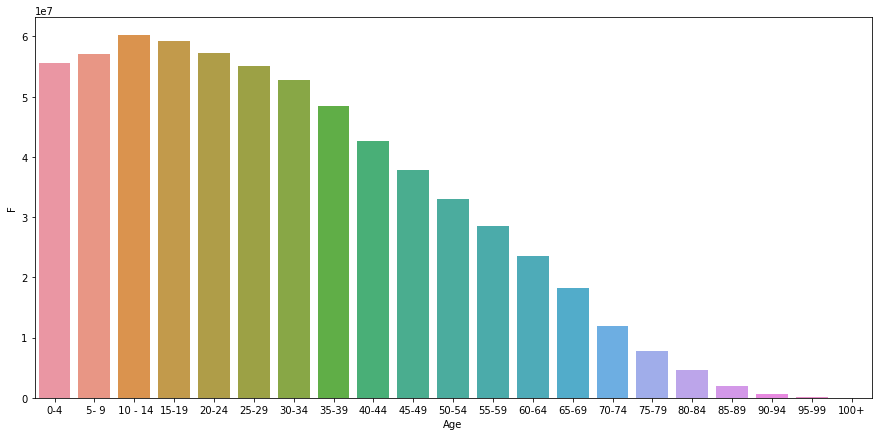

In [75]:
plt.figure(figsize=(15,7))
sns.barplot(x = "Age", y = "F", data = density_data)

The above values can be used with the contact matrix so extract the baseline but the major problem here is that the baseline obainted even after reducing the bins will be global and we have the mobility data which is regional. Here we can opt for two possibilies mentioned below - <br/>
• If we somehow find a dataset for the country level - The major advantage here will be that it is easier to get the correlation with the value of Reproduction number but at a later stage it will be difficult to incorporate it in the model. <br/>
• Other approach is the same as we have discussed earlier where we try to determine a function to get the baseline for each of the regional place thorugh some kind of population density function.

# Model using Contact Matrix

An introduction how the published paper has used this contact matrix and explain how it is something different from what we are looking forward to in this project.

$$C_{ij} = C_{ij}^{H} + C_{ij}^{S} + C_{ij}^{W} + C_{ij}^{O}$$

$$C_{ij}(t) = C_{ij} - \beta(t) (C_{ij}^{S} + C_{ij}^{W} + C_{ij}^{O})$$

Here beta indicates mobility change over time due to the imposement of certain movement restrictions such as lockdown and reduction in social groups activity.

The mobility does not explicity affect the change in contact in household because at any time in the day you are assumed to make that many number of contacts in your house irrespective of the public policies.

Approach - While modeling the reduction in the number of contacts what the paper has done is to use a control function which predicts the reduction with time and the impact with the lifting of the lockdown. We have to approach the statement differently since we are actually trying to model mobility through data and to see the correlation with respect to increase in infectious cases.

Another interesting equation mentioned in determining contact rates was -

$$C_{ij}(t) = C_{ij} - \beta_{s}(t) C_{ij}^{S} + \beta_{w}(t) C_{ij}^{W} + \beta_{o}(t) C_{ij}^{O}$$

Since we already have the contact matrix lets see if we can get a mobility time series -

# Mobility Time Series

In [43]:
df_grocery = pd.read_csv(r"C:\Users\varun\Desktop\Udacity\UGP\india\grocery.csv")
df_park = pd.read_csv(r"C:\Users\varun\Desktop\Udacity\UGP\india\parks.csv")
df_recreation = pd.read_csv(r"C:\Users\varun\Desktop\Udacity\UGP\india\recreational.csv")
df_residence = pd.read_csv(r"C:\Users\varun\Desktop\Udacity\UGP\india\residential.csv")
df_work = pd.read_csv(r"C:\Users\varun\Desktop\Udacity\UGP\india\workplace.csv")
print(df_grocery.shape)
print(df_park.shape)
print(df_recreation.shape)
print(df_residence.shape)
print(df_work.shape)

(345, 4)
(345, 4)
(345, 4)
(345, 4)
(345, 4)


In [50]:
df_grocery.head()

,index,Date,percent
0,0,17-02-2020,1.667
1,1,18-02-2020,1.750
2,2,19-02-2020,1.800
3,3,20-02-2020,2.000
4,4,21-02-2020,1.714


In [49]:
df_grocery = df_grocery.drop(columns=['Country', 'Code'])
df_grocery = df_grocery.reset_index()
df_park = df_park.drop(columns=['Country', 'Code'])
df_park = df_park.reset_index()
df_recreation = df_recreation.drop(columns=['Country', 'Code'])
df_recreation = df_recreation.reset_index()
df_residence = df_residence.drop(columns=['Country', 'Code'])
df_residence = df_residence.reset_index()
df_work = df_work.drop(columns=['Country', 'Code'])
df_work = df_work.reset_index()
print("Done")

Done


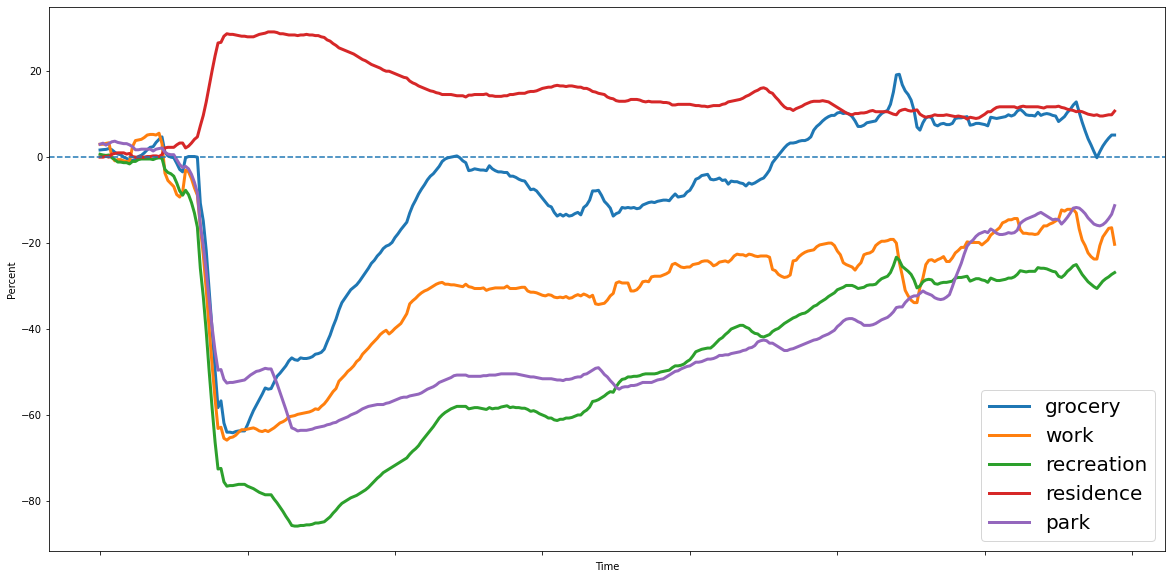

In [73]:
plt.figure(figsize=(20,10))
g = sns.lineplot(data = df_grocery, x = "index", y = "percent", label = "grocery", linewidth=3.0)
g = sns.lineplot(data = df_work, x = "index", y = "Percent", label = "work", linewidth=3.0)
g = sns.lineplot(data = df_recreation, x = "index", y = "Percent", label = "recreation", linewidth=3.0)
g = sns.lineplot(data = df_residence, x = "index", y = "Percent", label = "residence", linewidth=3.0)
g = sns.lineplot(data = df_park, x = "index", y = "Percent", label = "park", linewidth=3.0)
g.set(xticklabels=[])
g.set(xlabel="Time")
g.axhline(0, ls='--')
plt.legend(fontsize=20)
plt.show()

# Python Code

Lets try to work on the problem statement for this week wherein we try to accumulate all the contact matrix multiplying with the population of the particular bin and try to estimate a constant and try to model it with population or population density of the place so to see a correlation which we can at later stage utilize to go regionally in indian cities.

In [100]:
all_df1 = pd.read_excel(r"C:\Users\varun\Desktop\Udacity\UGP\contact_matrices_152_countries\MUestimates_all_locations_1.xlsx", sheet_name = None)
all_df2 = pd.read_excel(r"C:\Users\varun\Desktop\Udacity\UGP\contact_matrices_152_countries\MUestimates_all_locations_2.xlsx", sheet_name = None)
home_df1 = pd.read_excel(r"C:\Users\varun\Desktop\Udacity\UGP\contact_matrices_152_countries\MUestimates_home_1.xlsx", sheet_name = None)
home_df2 = pd.read_excel(r"C:\Users\varun\Desktop\Udacity\UGP\contact_matrices_152_countries\MUestimates_home_2.xlsx", sheet_name = None)
other_df1 = pd.read_excel(r"C:\Users\varun\Desktop\Udacity\UGP\contact_matrices_152_countries\MUestimates_other_locations_1.xlsx", sheet_name = None)
other_df2 = pd.read_excel(r"C:\Users\varun\Desktop\Udacity\UGP\contact_matrices_152_countries\MUestimates_other_locations_2.xlsx", sheet_name = None)
school_df1 = pd.read_excel(r"C:\Users\varun\Desktop\Udacity\UGP\contact_matrices_152_countries\MUestimates_school_1.xlsx", sheet_name = None)
school_df2 = pd.read_excel(r"C:\Users\varun\Desktop\Udacity\UGP\contact_matrices_152_countries\MUestimates_school_2.xlsx", sheet_name = None)
work_df1 = pd.read_excel(r"C:\Users\varun\Desktop\Udacity\UGP\contact_matrices_152_countries\MUestimates_work_1.xlsx", sheet_name = None)
work_df2 = pd.read_excel(r"C:\Users\varun\Desktop\Udacity\UGP\contact_matrices_152_countries\MUestimates_work_2.xlsx", sheet_name = None)
country_n1 = list(all_df1.keys())
country_n2 = list(all_df2.keys())

In [101]:
tick_names = all_df1[country_n1[0]].columns
tick_names

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16'],
      dtype='object')

In [103]:
for index in country_n2:
    all_df2[index].columns = tick_names
    home_df2[index].columns = tick_names
    other_df2[index].columns = tick_names
    school_df2[index].columns = tick_names
    work_df2[index].columns = tick_names
for index in country_n1:
    all_df1[index].columns = tick_names
    home_df1[index].columns = tick_names
    other_df1[index].columns = tick_names
    school_df1[index].columns = tick_names
    work_df1[index].columns = tick_names

In [104]:
country_n1

['Albania',
 'Algeria',
 'Andorra',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong SAR, China',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran (Islamic Republic of)',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kiribati',
 'Kuwait',
 'Kyrgyzstan',
 "Lao Peop

In [105]:
country_n2

['Mozambique',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Niger',
 'Nigeria',
 'Oman',
 'Pakistan',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Qatar',
 'Republic of Korea',
 'Romania',
 'Russian Federation',
 'Rwanda',
 'Saint Lucia',
 'Samoa',
 'Sao Tome and Principe ',
 'Saudi Arabia',
 'Senegal',
 'Serbia',
 'Seychelles',
 'Sierra Leone',
 'Singapore',
 'Slovakia',
 'Slovenia',
 'Solomon Islands',
 'South Africa',
 'Spain',
 'Sri Lanka',
 'Suriname',
 'Sweden',
 'Switzerland',
 'Syrian Arab Republic',
 'Taiwan',
 'Tajikistan',
 'TFYR of Macedonia',
 'Thailand',
 'Timor-Leste',
 'Tonga',
 'Tunisia',
 'Turkey',
 'Uganda',
 'Ukraine',
 'United Arab Emirates',
 'United Kingdom of Great Britain',
 'United Republic of Tanzania',
 'United States of America',
 'Uruguay',
 'Uzbekistan',
 'Vanuatu',
 'Venezuela (Bolivarian Republic ',
 'Viet Nam',
 'Yemen',
 'Zambia',
 'Zimbabwe']

Removing the countries for which the population data is not available from the same source 

In [106]:
country_n1.remove('Hong Kong SAR, China')
country_n1.remove('Andorra')

In [107]:
country_n2.remove('Samoa')
country_n2.remove('Taiwan')
country_n2.remove('United Republic of Tanzania')

Lets start working the first list of the countries and try to create a python program which could calculate the value which we are aiming for.

In [108]:
df = pd.DataFrame(columns = ['Country','Population','Total_index','Home','Other','School','Work'])

In [109]:
for index in country_n1:
    contact_matrix1 = all_df1[index]
    contact_matrix2 = home_df1[index]
    contact_matrix3 = other_df1[index]
    contact_matrix4 = school_df1[index]
    contact_matrix5 = work_df1[index]
    file_path_def ='C:\\Users\\varun\\Desktop\\Udacity\\UGP\\Population_density\\' + index + '-2019.csv'
    population = pd.read_csv(file_path_def)
    total = population['M'] + population['F']
    pop = sum(total)
    count1 = 0
    count2 = 0
    count3 = 0
    count4 = 0
    count5 = 0
    for i in range(16) :
        colum = 'X' + str(i+1);
        val1 = contact_matrix1[colum]
        val2 = contact_matrix2[colum]
        val3 = contact_matrix3[colum]
        val4 = contact_matrix4[colum]
        val5 = contact_matrix5[colum]
        temp1 = sum(val1)
        temp2 = sum(val2)
        temp3 = sum(val3)
        temp4 = sum(val4)
        temp5 = sum(val5)
        count1 += temp1*total[i]
        count2 += temp2*total[i]
        count3 += temp3*total[i]
        count4 += temp4*total[i]
        count5 += temp5*total[i]
    new_row = {'Country' : index,'Population' : pop ,'Total_index' : count1,'Home': count2,'Other': count3, 'School': count4, 'Work': count5}
    df = df.append(new_row, ignore_index=True)

In [110]:
for index in country_n2:
    contact_matrix1 = all_df2[index]
    contact_matrix2 = home_df2[index]
    contact_matrix3 = other_df2[index]
    contact_matrix4 = school_df2[index]
    contact_matrix5 = work_df2[index]
    file_path_def ='C:\\Users\\varun\\Desktop\\Udacity\\UGP\\Population_density\\' + index + '-2019.csv'
    population = pd.read_csv(file_path_def)
    total = population['M'] + population['F']
    pop = sum(total)
    count1 = 0
    count2 = 0
    count3 = 0
    count4 = 0
    count5 = 0
    for i in range(16) :
        colum = 'X' + str(i+1);
        val1 = contact_matrix1[colum]
        val2 = contact_matrix2[colum]
        val3 = contact_matrix3[colum]
        val4 = contact_matrix4[colum]
        val5 = contact_matrix5[colum]
        temp1 = sum(val1)
        temp2 = sum(val2)
        temp3 = sum(val3)
        temp4 = sum(val4)
        temp5 = sum(val5)
        count1 += temp1*total[i]
        count2 += temp2*total[i]
        count3 += temp3*total[i]
        count4 += temp4*total[i]
        count5 += temp5*total[i]
    new_row = {'Country' : index,'Population' : pop ,'Total_index' : count1,'Home': count2,'Other': count3, 'School': count4, 'Work': count5}
    df = df.append(new_row, ignore_index=True)

In [111]:
df.head()

,Country,Population,Total_index,Home,Other,School,Work
0,Albania,2880913,3.838068e+07,1.068326e+07,1.430326e+07,5.625936e+06,7.768229e+06
1,Algeria,43053054,6.373596e+08,1.759553e+08,2.863821e+08,1.147987e+08,6.022355e+07
2,Antigua and Barbuda,97115,1.584368e+06,4.161274e+05,5.464844e+05,2.242885e+05,3.974679e+05
3,Argentina,44780675,6.731221e+08,2.020790e+08,2.373145e+08,9.613251e+07,1.375961e+08
4,Armenia,2957728,4.185080e+07,1.164423e+07,1.455815e+07,6.163886e+06,9.484537e+06


In [112]:
df.shape

(146, 7)

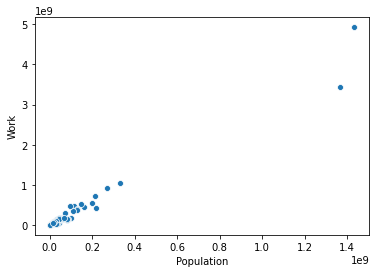

In [119]:
sns.scatterplot(x = 'Population', y = 'Work', data = df)

The outliers must be india and china due the population 

In [113]:
df.to_csv('Final.csv')

### Analyse the Dataset

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [22]:
main_df = pd.read_csv(r"C:\Users\varun\Desktop\Udacity\Final.csv")
main_df.shape

(146, 8)

In [4]:
main_df.drop(main_df.loc[main_df['Country']=='India'].index, inplace=True)
main_df.drop(main_df.loc[main_df['Country']=='China'].index, inplace=True)

In [5]:
main_df.shape

(144, 8)

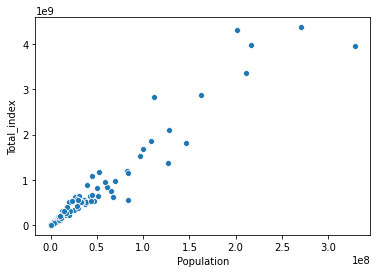

In [8]:
sns.scatterplot(x = 'Population', y = 'Total_index', data = main_df)

In [35]:
X = main_df['Population'].values
y = main_df['Total_index'].values
X = X.reshape(-1,1)
#y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print(X_train.shape); print(X_test.shape)

(116, 1)
(30, 1)


We can proceed with multiple options here - <br/>
• Linear Regression on 1. all entries 2. excluding india and china <br/>
• Non Linear Regression on 1. all entries 2. excluding india and china

Linear regression

In [17]:
model = LinearRegression().fit(X_train, y_train)

In [31]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9867897528206275
0.9585128045893213


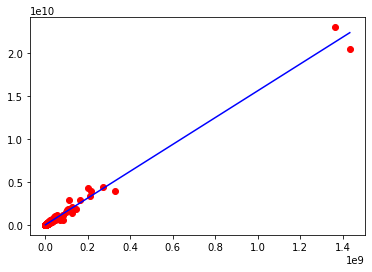

In [24]:
X_grid = np.arange(min(X), max(X), 1000) 
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, model.predict(X_grid), color = 'blue')

SVM Regression